In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pprint import pprint
import json
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams["errorbar.capsize"] = 5

def num_fields(form):
    nums = np.array((0,0,0,0)) # (obl. fields, opt. fields, filled obl. fields, filled opt. fields)
    if not isinstance(form, dict):
        return (0,0,0,0) # went too deep, nothing to find here
    if 'answer' in form.keys() and 'required' in form.keys():
        if form['required']:
            try:
                if form['answer'] is not None and form['answer'] != "":
                    return (1,0,1,0)
                else:
                    return (1,0,0,0)
            except KeyError:
                pass
        elif not form['required']:
            try:
                if form['answer'] is not None and form['answer'] != "":
                    return (0,1,0,1)
                else:
                    return (0,1,0,0)
            except KeyError:
                pass
    for key in form:
        if isinstance(form[key], dict):
            nums += num_fields(form[key])
    return nums

STORE_PATH = 'result_store'
models = ['gpt', 'openbuddy_70', 'sheep_duck']
forms = ['disc', 'epa', 'med', 'ss5']
effs = {}
for m in models:
    effs[m] = {}
    for f in forms:
        effs[m][f] = {'turns': [], 'fields': []}
        root = os.path.join(STORE_PATH, m, f)
        dirs = os.listdir(root)
        for d in dirs:
            with open(os.path.join(root, d, 'filled-form.json'), 'r', encoding='utf-8') as g:
                form = json.load(g)
            fields = num_fields(form)
            effs[m][f]['fields'].append(int(fields[2]) + int(fields[3]))
            with open(os.path.join(root, d, 'dialogue.json'), 'r') as g:
                dial = json.load(g)
            effs[m][f]['turns'].append(int(len(dial)/2))
with open('look.json', 'w') as f:
    json.dump(effs, f)

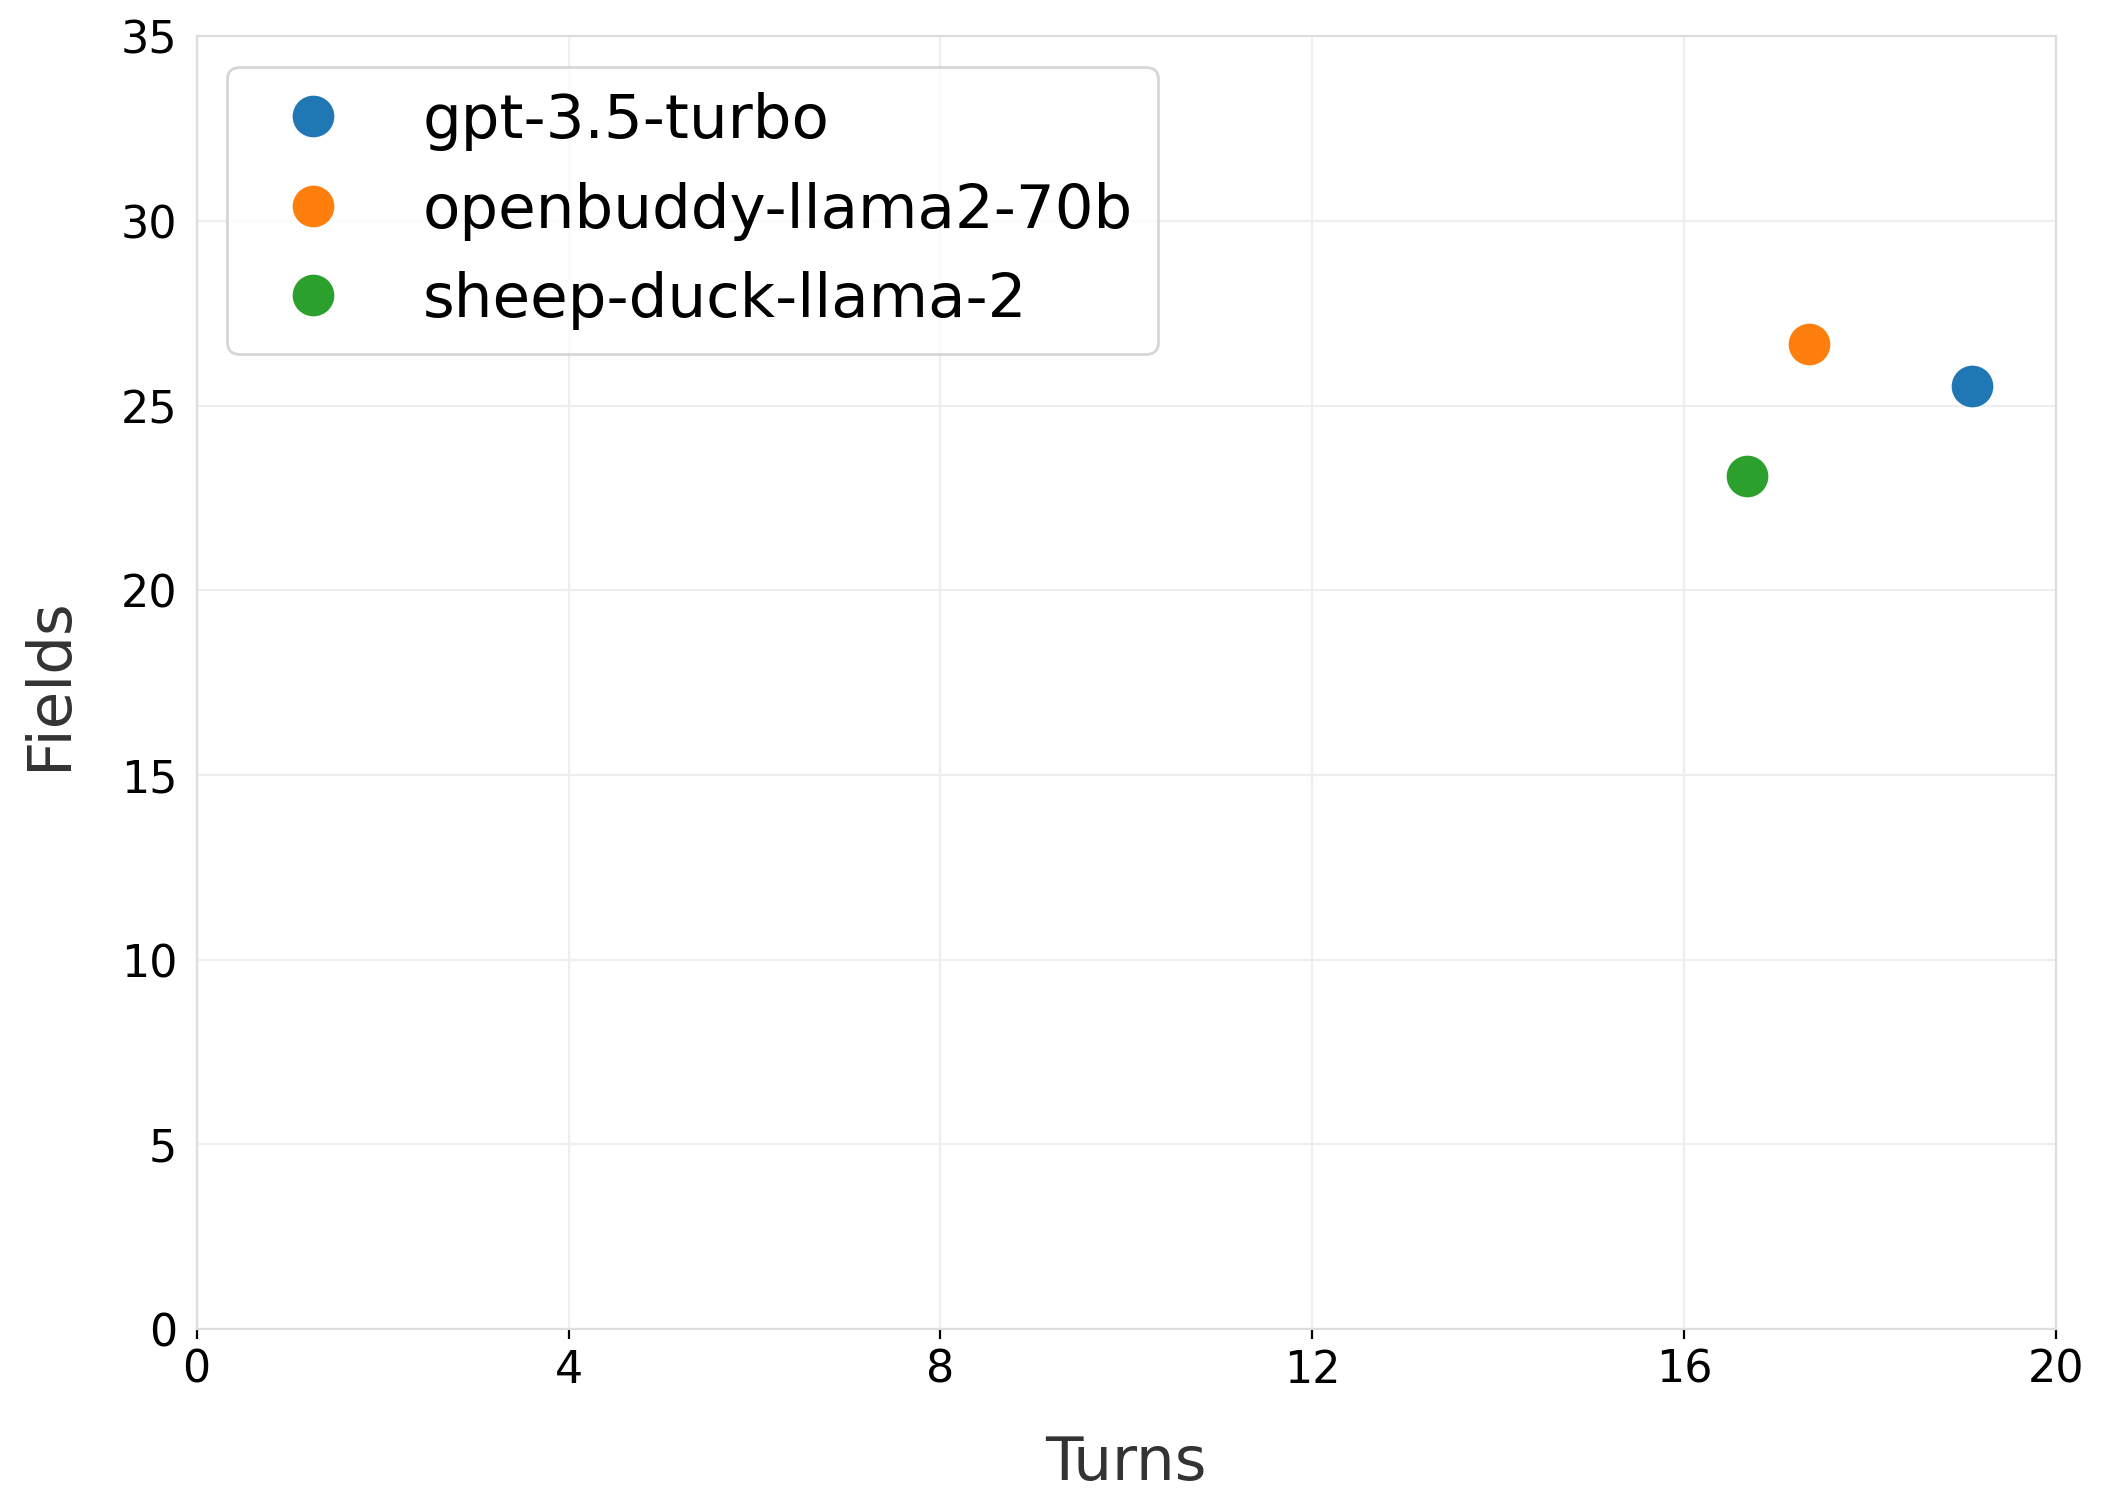

In [33]:
avgs = {m: {'turns': 0, 'fields': 0} for m in models}
for m in models:
    for f in forms:
        avgs[m]['turns'] += sum(effs[m][f]['turns'])
        avgs[m]['fields'] += sum(effs[m][f]['fields'])
    avgs[m]['turns'] = avgs[m]['turns'] / 40
    avgs[m]['fields'] = avgs[m]['fields'] / 40


fig, ax = plt.subplots()
ax.plot(avgs[models[0]]['turns'],avgs[models[0]]['fields'], 'o', markersize=14)
ax.plot(avgs[models[1]]['turns'],avgs[models[1]]['fields'], 'o', markersize=14)
ax.plot(avgs[models[2]]['turns'],avgs[models[2]]['fields'], 'o', markersize=14)


fig.tight_layout()
ax.spines['top'].set_color('#DDDDDD')
ax.spines['right'].set_color('#DDDDDD')
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=True, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True, color='#EEEEEE')
ax.set_xticks(range(0, 21, 4))
ax.set_yticks(range(0, 36, 5))
# ax.set_xticklabels(models)
ax.legend(['gpt-3.5-turbo', 'openbuddy-llama2-70b', 'sheep-duck-llama-2'], fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=16)

ax.set_xlabel('Turns', labelpad=15, color='#333333', fontsize=22)
ax.set_ylabel('Fields', labelpad=15, color='#333333', fontsize=22)
# ax.set_title('Turns taken - Fields filled (average)', pad=15, color='#333333',
#              weight='bold', fontsize=24)
fig.savefig("efficiency_graph_avg.pdf", format='pdf', bbox_inches='tight')

gpt; disc; 7.5; 12.4
openbuddy_70; disc; 7.0; 13.6
sheep_duck; disc; 8.0; 13.7
gpt; epa; 14.1; 14.5
openbuddy_70; epa; 15.0; 13.8
sheep_duck; epa; 15.8; 13.0
gpt; med; 40.8; 49.6
openbuddy_70; med; 35.0; 50.0
sheep_duck; med; 32.3; 49.9
gpt; ss5; 14.0; 25.6
openbuddy_70; ss5; 12.4; 29.3
sheep_duck; ss5; 10.6; 15.8


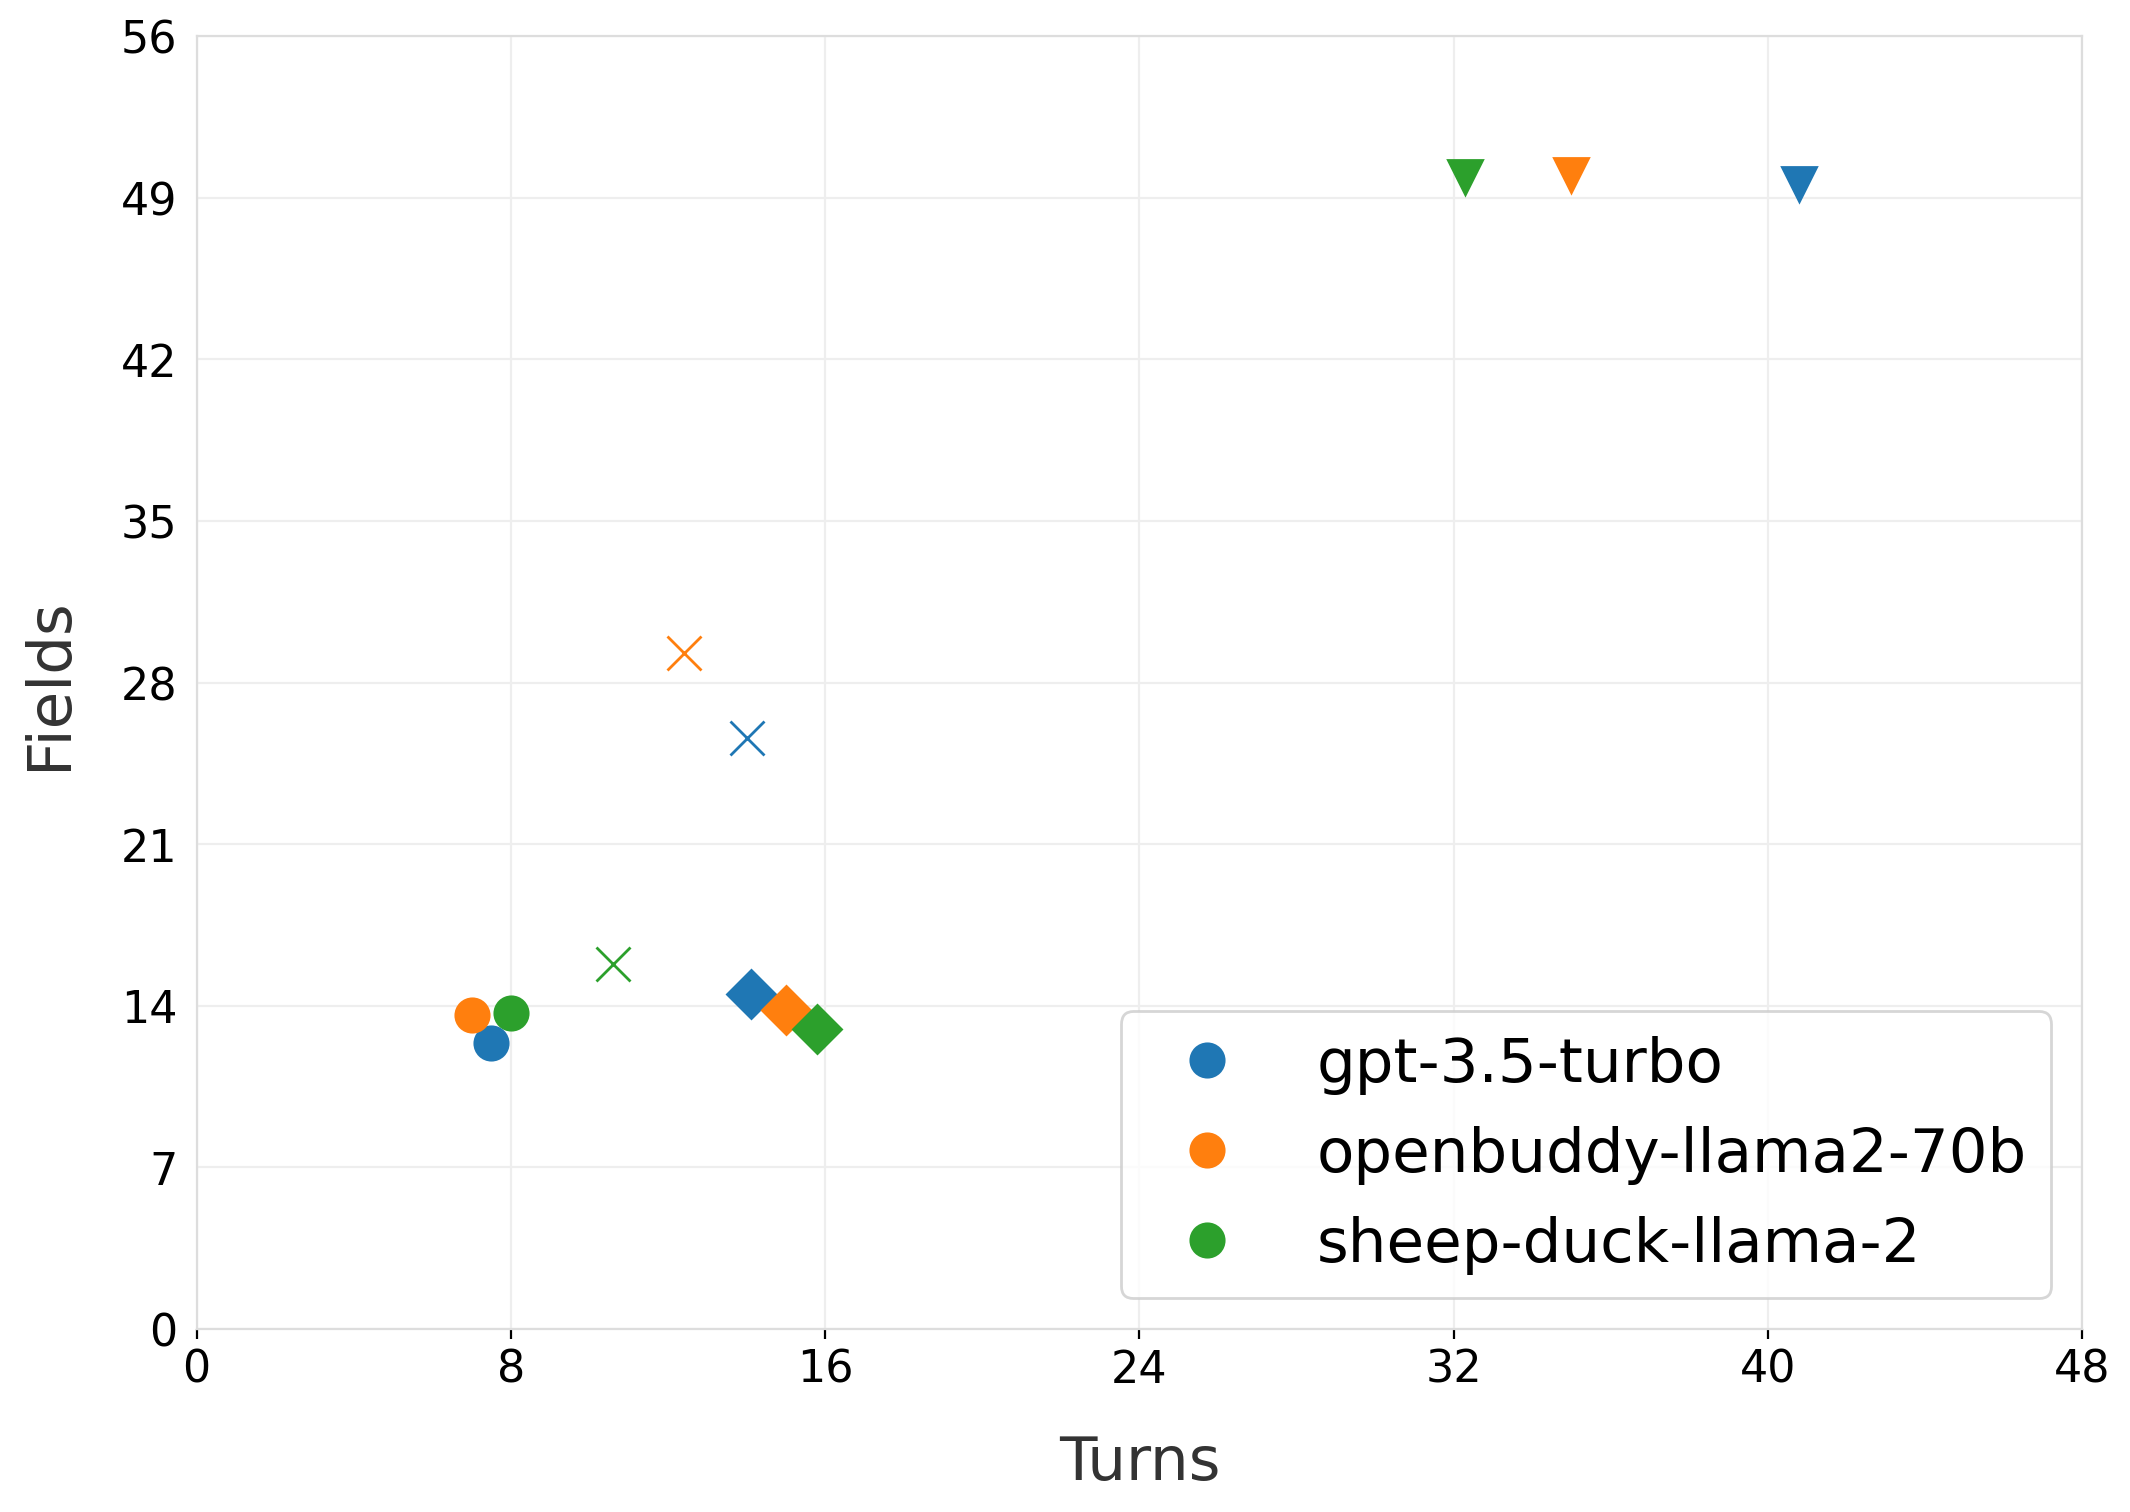

In [34]:


markers = ['o', 'D', 'v', 'x']
fig, ax = plt.subplots()

for i, f in enumerate(forms):
    avgs = {m: {'turns': 0, 'fields': 0} for m in models}
    for m in models:
        avgs[m]['turns'] += sum(effs[m][f]['turns'])
        avgs[m]['fields'] += sum(effs[m][f]['fields'])
        avgs[m]['turns'] = avgs[m]['turns'] / 10
        avgs[m]['fields'] = avgs[m]['fields'] / 10
        print(m, end='; ')
        print(f, end='; ')
        print(avgs[m]['turns'], end='; ')
        print(avgs[m]['fields'])


    ax.plot(avgs[models[0]]['turns'],avgs[models[0]]['fields'], markers[i], markersize=12, c='C0')
    ax.plot(avgs[models[1]]['turns'],avgs[models[1]]['fields'], markers[i], markersize=12, c='C1')
    ax.plot(avgs[models[2]]['turns'],avgs[models[2]]['fields'], markers[i], markersize=12, c='C2')


fig.tight_layout()
ax.spines['top'].set_color('#DDDDDD')
ax.spines['right'].set_color('#DDDDDD')
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=True, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True, color='#EEEEEE')
ax.set_xticks(range(0, 55, 8))
ax.set_yticks(range(0, 57, 7))
# ax.set_xticklabels(models)
ax.legend(['gpt-3.5-turbo', 'openbuddy-llama2-70b', 'sheep-duck-llama-2'], fontsize=22, loc='lower right')

ax.tick_params(axis='both', which='major', labelsize=16)

ax.set_xlabel('Turns', labelpad=15, color='#333333', fontsize=22)
ax.set_ylabel('Fields', labelpad=15, color='#333333', fontsize=22)
# ax.set_title('Turns taken - Fields filled (average)', pad=15, color='#333333',
#              weight='bold', fontsize=24)
fig.savefig("efficiency_graph.pdf", format='pdf', bbox_inches='tight')

In [35]:
print(models)
print(markers)

['gpt', 'openbuddy_70', 'sheep_duck']
['o', 'D', 'v', 'x']
